# Let's start working

**I will follow and apply data processing techniques one by one, with the aim of improving results.**

**The main objective here is to apply the techniques of feature selection and know their impact on the results. Therefore, we may stop the application as soon as we notice a change in the accuracy of the results.**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Now I will try to apply the techniques for choosing the features that I previously published on my LinkedIn account yesterday.
In addition to applying the genetic algorithm, I will compare the results for each one and see the best case scenario in that case**

In [3]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**In the beginning, and before entering into the techniques for selecting features, I will adjust the data, refine it and treat it from some problems at the beginning, and then work will begin in the second part.**

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**There are no missing values shown here.**

In [7]:
data = data.drop(["Unnamed: 32"],axis=1)
data = data.drop(["id"],axis=1)

# Outlier management

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# Capping the outlier rows with percentiles
upper_lim = data['fractal_dimension_worst'].quantile(.99)
lower_lim = data['fractal_dimension_worst'].quantile(.01)

In [11]:
data.loc[(data['fractal_dimension_worst'] > upper_lim), 'fractal_dimension_worst'] = upper_lim
data.loc[(data['fractal_dimension_worst'] < lower_lim), 'fractal_dimension_worst'] = lower_lim
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.118900
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.089020
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.087580
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.140628
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.076780


# One-hot encoding
**for the target column**

**One-hot encoding is an often-used technique in machine learning for feature
engineering**
**so one-hot encoding is a way to convert these categorical features into numerical
features.**
**Here I will follow one of the tips, which is that I will focus on the malignant tumor more than the benign tumor, but by looking at the number of supporting data for each category of data, we notice that the number of data supporting the benign tumor is more than the other category, and therefore I will give the value No. 1- to the benign tumor and No. 1 to the tumor The malignant, and therefore I have formed a balance to some extent at that point and provided some balance to the data.**

In [12]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': -1})

**Here I do what is called the initial separation between the target column and the rest of the features.**

In [13]:
# independent columns
x = data.drop(["diagnosis"],axis=1)
# pick last column for the target feature
y = data["diagnosis"]

In [14]:
x.shape

(569, 30)

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [16]:
y.value_counts()

-1    357
 1    212
Name: diagnosis, dtype: int64

**The total difference between the number of categories comprising the target column is not large and therefore we leave the matter as it is for the time being unless it turns out otherwise.**

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.20, random_state = 44)

In [18]:
print('X_train after :',X_train.shape)
print('X_valid after :' , X_valid.shape)
print('y_train after :',y_train.shape)
print('y_valid after :' , y_valid.shape)

X_train after : (455, 30)
X_valid after : (114, 30)
y_train after : (455,)
y_valid after : (114,)


In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [21]:
#Calculating Prediction
y_predict_model = model.predict(X_valid)
y_predict_model

array([ 1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1])

In [22]:
#Calculating Details
print('model Train Score is : ' , model.score(X_train, y_train))
print('model Test Score is : ' , model.score(X_valid, y_valid))

model Train Score is :  1.0
model Test Score is :  0.9736842105263158


In [23]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix=confusion_matrix(y_valid,y_predict_model)
confusion_matrix

array([[74,  1],
       [ 2, 37]])

In [24]:
print(model.feature_importances_)

[0.05511552 0.0197362  0.04475546 0.06475969 0.01406567 0.0307975
 0.07085729 0.07864905 0.00770988 0.00738157 0.02049988 0.00609739
 0.03473616 0.02932501 0.00661339 0.00755341 0.01088258 0.00848938
 0.00600326 0.0069018  0.07459543 0.03138131 0.0659738  0.07344813
 0.02656822 0.02915003 0.02968018 0.107362   0.01645505 0.01445578]


In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances

radius_mean                0.055116
texture_mean               0.019736
perimeter_mean             0.044755
area_mean                  0.064760
smoothness_mean            0.014066
compactness_mean           0.030798
concavity_mean             0.070857
concave points_mean        0.078649
symmetry_mean              0.007710
fractal_dimension_mean     0.007382
radius_se                  0.020500
texture_se                 0.006097
perimeter_se               0.034736
area_se                    0.029325
smoothness_se              0.006613
compactness_se             0.007553
concavity_se               0.010883
concave points_se          0.008489
symmetry_se                0.006003
fractal_dimension_se       0.006902
radius_worst               0.074595
texture_worst              0.031381
perimeter_worst            0.065974
area_worst                 0.073448
smoothness_worst           0.026568
compactness_worst          0.029150
concavity_worst            0.029680
concave points_worst       0

In [26]:
feat_importances = feat_importances.sort_values()
feat_importances

symmetry_se                0.006003
texture_se                 0.006097
smoothness_se              0.006613
fractal_dimension_se       0.006902
fractal_dimension_mean     0.007382
compactness_se             0.007553
symmetry_mean              0.007710
concave points_se          0.008489
concavity_se               0.010883
smoothness_mean            0.014066
fractal_dimension_worst    0.014456
symmetry_worst             0.016455
texture_mean               0.019736
radius_se                  0.020500
smoothness_worst           0.026568
compactness_worst          0.029150
area_se                    0.029325
concavity_worst            0.029680
compactness_mean           0.030798
texture_worst              0.031381
perimeter_se               0.034736
perimeter_mean             0.044755
radius_mean                0.055116
area_mean                  0.064760
perimeter_worst            0.065974
concavity_mean             0.070857
area_worst                 0.073448
radius_worst               0

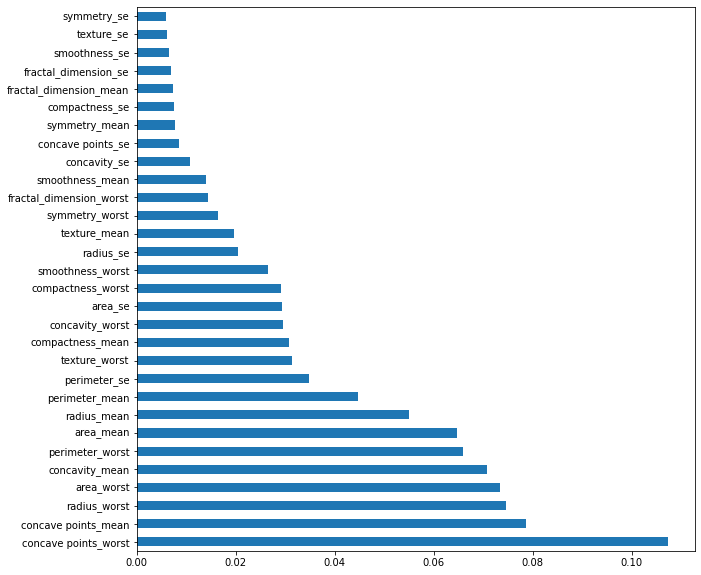

In [27]:
plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

**I'm going to drop 14 columns that are less valuable in affecting the results and retrain the model to see what the results are.**

In [28]:
columns=X_train[['fractal_dimension_se', 'symmetry_se' , 'smoothness_se' , 'symmetry_mean', 'fractal_dimension_mean','texture_se','compactness_se','concavity_se','concave points_se','smoothness_mean','symmetry_worst','fractal_dimension_worst','area_se','radius_se']]
X_train_2=X_train.drop(columns, axis=1)

columns=X_valid[['fractal_dimension_se', 'symmetry_se' , 'smoothness_se' , 'symmetry_mean', 'fractal_dimension_mean','texture_se','compactness_se','concavity_se','concave points_se','smoothness_mean','symmetry_worst','fractal_dimension_worst','area_se','radius_se']]
X_valid_2=X_valid.drop(columns, axis=1)

In [29]:
model_2 = ExtraTreesClassifier()
model_2.fit(X_train_2,y_train)

#Calculating Prediction
y_predict_model_2 = model_2.predict(X_valid_2)
print(y_predict_model_2)
print("-*-"*40)
#Calculating Details
print('model_2 Train Score is : ' , model_2.score(X_train_2, y_train))
print('model_2 Test Score is : ' , model_2.score(X_valid_2, y_valid))

[ 1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1
  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
model_2 Train Score is :  1.0
model_2 Test Score is :  0.9736842105263158


**After taking this procedure, we note that the results have not changed, but the model speed has improved.**

[[74  1]
 [ 2 37]] 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

[0.05511552 0.0197362  0.04475546 0.06475969 0.01406567 0.0307975
 0.07085729 0.07864905 0.00770988 0.00738157 0.02049988 0.00609739
 0.03473616 0.02932501 0.00661339 0.00755341 0.01088258 0.00848938
 0.00600326 0.0069018  0.07459543 0.03138131 0.0659738  0.07344813
 0.02656822 0.02915003 0.02968018 0.107362   0.01645505 0.01445578] 



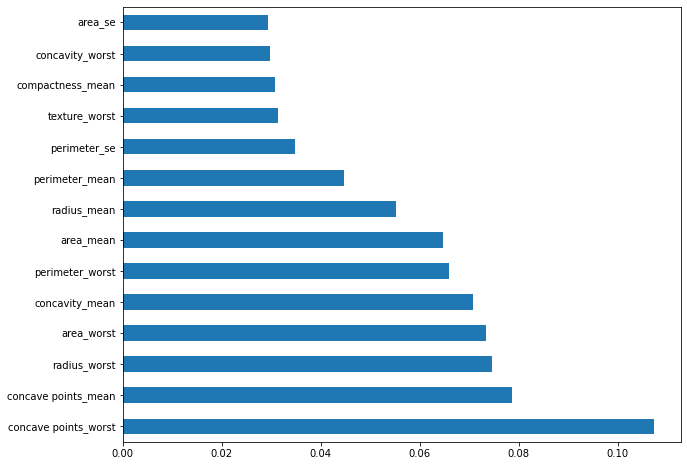

In [30]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix=confusion_matrix(y_valid,y_predict_model_2)
print(confusion_matrix,"\n")
print("-*-"*40 , "\n")
print(model.feature_importances_ ,"\n")
plt.figure(figsize=(10,8))
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

# Feature selection
**I will achieve this part in some ways.If it is necessary**

# 1. forward selection method

**Forward Selection: The forward selection method is an iterative process that
starts by having no features in the dataset. During each iteration, features
are added with the intent of improving the performance of the model. If
performance is improved, the features are kept. Features that do not improve
the results are discarded. The process continues until improvement of the
model stalls.**

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build EXC classifier to use in feature selection

clf = ExtraTreesClassifier(n_estimators=60, n_jobs=-1,random_state=42)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=9)

# Perform SFFS
sfs1 = sfs1.fit(X_train_2, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   33.6s finished

[2022-07-21 21:45:09] Features: 1/10 -- score: 0.8748148148148148[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   29.8s finished

[2022-07-21 21:45:38] Features: 2/10 -- score: 0.9514161220043573[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   28.0s finished

[2022-07-21 21:46:06] Features: 3/10 -- score: 0.9580392156862746[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [32]:
help(sfs)

Help on class SequentialFeatureSelector in module mlxtend.feature_selection.sequential_feature_selector:

class SequentialFeatureSelector(mlxtend.utils.base_compostion._BaseXComposition, sklearn.base.MetaEstimatorMixin)
 |  SequentialFeatureSelector(estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None)
 |  
 |  Sequential Feature Selection for Classification and Regression.
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  k_features : int or tuple or str (default: 1)
 |      Number of features to select,
 |      where k_features < the full feature set.
 |      New in 0.4.2: A tuple containing a min and max value can be provided,
 |          and the SFS will consider return any feature combination between
 |          min and max that scored highest in cross-validation. For example,
 |          the tuple (1, 4) will return any combinatio

In [33]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 7, 9, 10, 11, 12, 13, 15]


**The columns at these indexes are those which were selected, which is very good, now we can build on those features to build a full model using our training and test sets**

In [34]:
columns=X_train_2[['area_mean', 'compactness_mean' , 'concavity_mean' , 'perimeter_se', 'compactness_worst','concavity_worst','concave points_worst']]
X_train_3=X_train_2.drop(columns, axis=1)

columns=X_valid_2[['area_mean', 'compactness_mean' , 'concavity_mean' , 'perimeter_se', 'compactness_worst','concavity_worst','concave points_worst']]
X_valid_3=X_valid_2.drop(columns, axis=1)

In [35]:
from sklearn.metrics import accuracy_score as acc
# Build full model with selected features
clf = ExtraTreesClassifier(random_state=42)

clf.fit(X_train_3, y_train)

ExtraTreesClassifier(random_state=42)

In [36]:
#Calculating Prediction for train data 
y_predict_train_model_3 = clf.predict(X_train_3)
#Calculating Prediction for test data 
y_predict_test_model_3 = clf.predict(X_valid_3)

In [37]:
from sklearn.metrics import accuracy_score
print("accuracy of train data ",accuracy_score(y_train, y_predict_train_model_3))
print("accuracy of test data ",accuracy_score(y_valid, y_predict_test_model_3))

accuracy of train data  1.0
accuracy of test data  0.9824561403508771


**After using the forward selection method, the accuracy level has increased significantly.**

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_valid,y_predict_test_model_3)

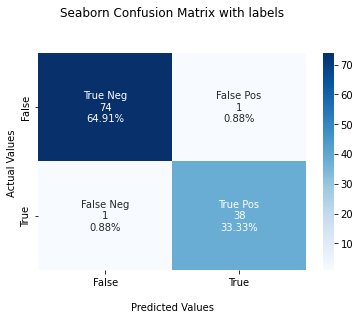

In [41]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**The results have already changed, so I'll stop here for now.**

**But I will come back with a new way that improves the results.
Maybe next time I use a genetic algorithm in the feature selection process.**